# Evaluation
We want to now evaluate the performance of an LLM on the dataset we created. For this we are using the Parsee datasets evaluation tools, as this will also parse the answers of the LLM according to the extraction template, so small variations in an answer are not going to influence the final result.

In [9]:
parsee_api_key = "API_KEY"
anthropic_key = "ANTHROPIC_KEY"

In [5]:
from parsee.cloud.api import ParseeCloud
from parsee.datasets.readers.disk_reader import SimpleCsvDiskReader
from parsee.extraction.models.helpers import anthropic_config
from parsee.datasets.evaluation.main import evaluate_llm_performance

cloud = ParseeCloud(parsee_api_key)
template = cloud.get_template("65f95cc2e34036446ee85a00") # this is the revenues template

# reading the data from the csv that is included in the repo
reader = SimpleCsvDiskReader("./data/revenues_langchain.csv")

# requires API key from replicate
model = anthropic_config(anthropic_key, "claude-3-opus-20240229")

Run the evaluation:

In [ ]:
performance = evaluate_llm_performance(template, reader, [model])

or use the pre-calculated performance from our run:

In [6]:
performance = {'Anthropic model: claude-3-opus-20240229': {'completion': 1.0, 'total_correct': 24, 'total_correct_meta_found': 19, 'missing_answers': 13, 'error_log': [{'doc': 'e6770bda9a6943b6b13e083e1641b1bb030aa59fdfb3b1323b6cc69c938c3df9', 'class_id': 'revenues', 'type': 'meta', 'expected': 'meta0:millions_meta1:EUR_meta2:n/a_meta3:3', 'actual': 'meta0:millions_meta1:EUR_meta2:2020-03-31_meta3:3'}, {'doc': '912b2634f1ca842bc797e7f515a3268e0c2c5f93ff96bab80e72ce096dbdc619', 'class_id': 'revenues', 'type': 'meta', 'expected': 'meta0:millions_meta1:EUR_meta2:2020-12-31_meta3:3', 'actual': 'meta0:millions_meta1:EUR_meta2:2020-03-31_meta3:3'}, {'doc': '912b2634f1ca842bc797e7f515a3268e0c2c5f93ff96bab80e72ce096dbdc619', 'class_id': 'revenues', 'type': 'meta', 'expected': 'meta0:millions_meta1:EUR_meta2:2021-12-31_meta3:3', 'actual': 'meta0:millions_meta1:EUR_meta2:2021-03-31_meta3:3'}, {'doc': '775c36ece6c32bfafff3a763f75b2fc657549ddacd980daccbe8d4542ad1af6d', 'class_id': 'revenues', 'type': 'meta', 'expected': 'meta0:millions_meta1:EUR_meta2:2020-12-31_meta3:12', 'actual': 'meta0:millions_meta1:EUR_meta3:12'}, {'doc': '775c36ece6c32bfafff3a763f75b2fc657549ddacd980daccbe8d4542ad1af6d', 'class_id': 'revenues', 'type': 'meta', 'expected': 'meta0:millions_meta1:EUR_meta2:2021-12-31_meta3:12', 'actual': 'meta0:millions_meta1:EUR_meta2:n/a_meta3:12'}], 'completeness': 0.6578947368421053, 'total_correct_percent': 0.631578947368421, 'total_correct_meta_found_percent': 0.5, 'total_correct_percent_ex_missing': 0.96, 'total_correct_meta_found_percent_ex_missing': 0.76}, 'assigned': {'completion': 1.0, 'total_correct': 38, 'total_correct_meta_found': 38, 'missing_answers': 0, 'error_log': [], 'completeness': 1.0, 'total_correct_percent': 1.0, 'total_correct_meta_found_percent': 1.0, 'total_correct_percent_ex_missing': 1.0, 'total_correct_meta_found_percent_ex_missing': 1.0}}

## Visualisation of Results

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
plt.style.use('seaborn-v0_8')

model_names = (model.name,)
scores = {
    'Completeness': (performance[model.name]["completeness"]*100,),
    'Revenues Correct': (performance[model.name]["total_correct_percent"]*100,),
    'Revenues Correct (excluding missing answers)': (performance[model.name]["total_correct_percent_ex_missing"]*100,),
    'Meta Items Correct': (performance[model.name]["total_correct_meta_found_percent"]*100,),
    'Meta Items Correct (excluding missing answers)': (performance[model.name]["total_correct_meta_found_percent_ex_missing"]*100,),
}

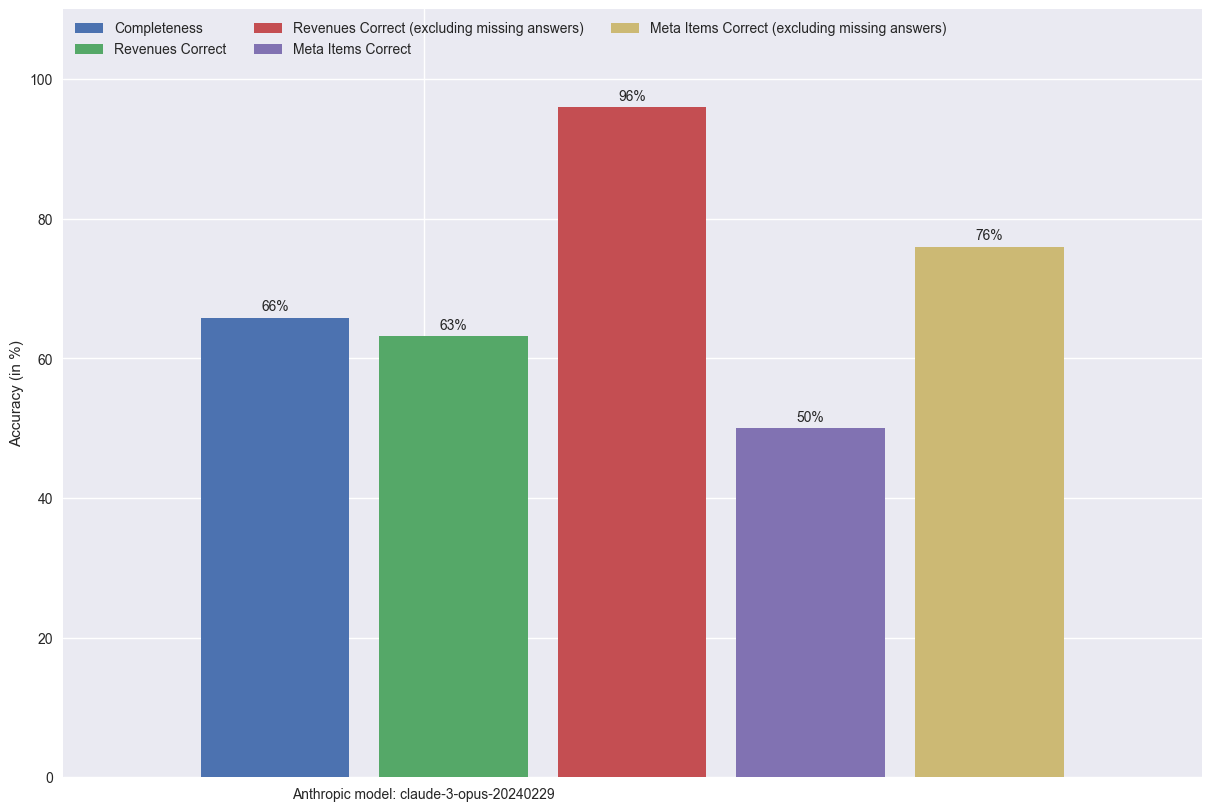

In [8]:
x = np.arange(len(model_names))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

plt.rcParams["figure.figsize"] = (12,8)

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in scores.items():
    offset = (width+0.05) * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3, fmt='%.0f%%')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (in %)')
ax.set_xticks(x + width, model_names)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 100)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

x0, x1, y0, y1 = plt.axis()
margin_x = 0.1 * (x1-x0)
margin_y = 0.1 * (y1-y0)
plt.axis((x0 - margin_x,
          x1 + margin_x,
          y0,
          y1 + margin_y))

plt.show()